In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('insurance.csv')

In [32]:
data=data.drop(index = list(range(data.shape[0] // 16, data.shape[0])))

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
data = data.dropna(axis=1, how='any')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
78,22,female,39.805,0,no,northeast,2755.02095
79,41,female,32.965,0,no,northwest,6571.02435
80,31,male,26.885,1,no,northeast,4441.21315
81,45,female,38.285,0,no,northeast,7935.29115


In [35]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

age - int64 - 0
sex - object - 0
bmi - float64 - 0
children - int64 - 0
smoker - object - 0
region - object - 0
charges - float64 - 0


In [36]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

sex
smoker
region


In [37]:
le1 = LabelEncoder()
data['sex'] = le1.fit_transform(data['sex']);

In [38]:
le2 = LabelEncoder()
data['smoker'] = le2.fit_transform(data['smoker']);

In [39]:
le3 = LabelEncoder()
data['region'] = le3.fit_transform(data['region']);

In [40]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

In [41]:
from sklearn.model_selection import train_test_split

data_x = data.loc[:, data.columns != 'age']
data_y = data['age']

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [42]:
train_x.shape

(58, 6)

In [43]:
test_x.shape

(25, 6)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

In [45]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [46]:
test_model(ran_80)

mean_absolute_error: 5.44
median_absolute_error: 3.75
r2_score: 0.8


In [47]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [49]:
reg = gs.best_estimator_

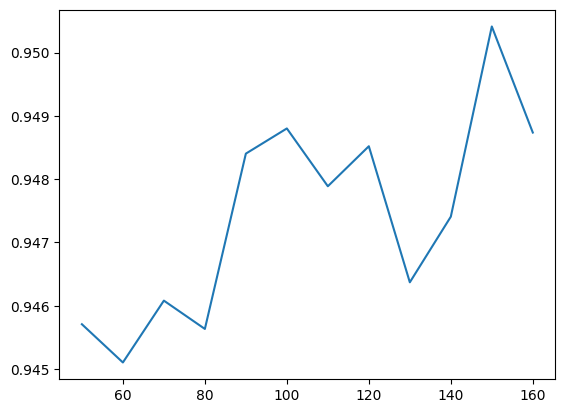

In [50]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

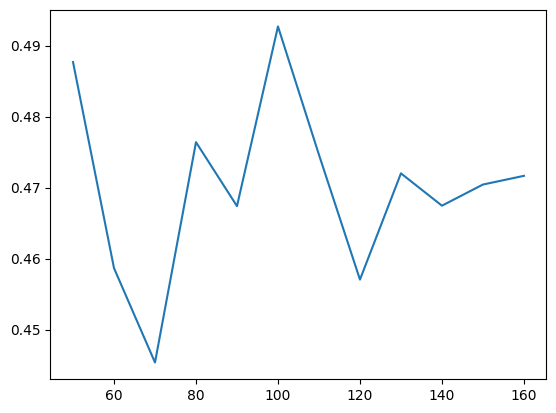

In [51]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [52]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 5.36
median_absolute_error: 3.99
r2_score: 0.82


In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [54]:
test_model(gr_80)

mean_absolute_error: 6.64
median_absolute_error: 4.44
r2_score: 0.66


In [55]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(data_x, data_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [56]:
reg = gs.best_estimator_

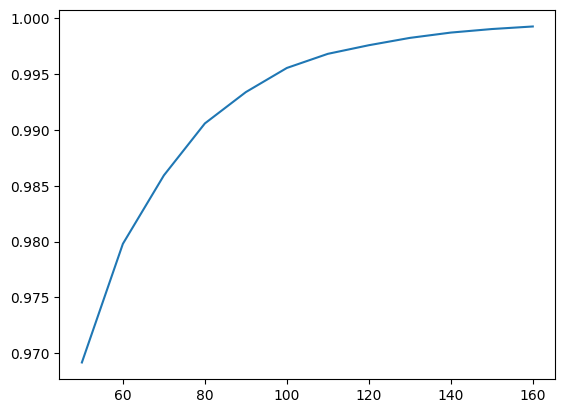

In [57]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

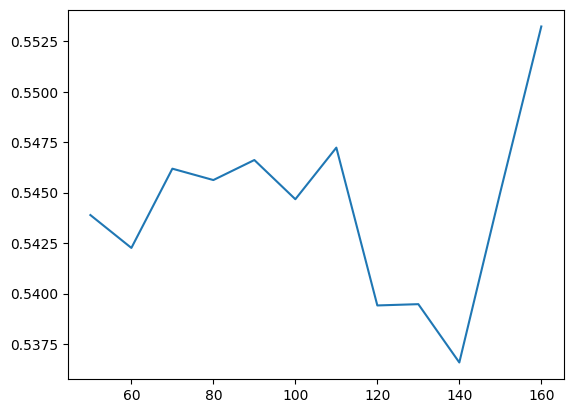

In [58]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [59]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 6.75
median_absolute_error: 4.11
r2_score: 0.64
